In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as  plt
import seaborn as sns
plt.style.use("ggplot")
from matplotlib.pyplot import figure
import re

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)
df=pd.read_csv("D:\Screenshots\movies\movies.csv")

In [57]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [58]:
for col in df.columns:
    pct=np.mean(df[col].isnull())
    print(col,pct,'%')

name 0.0 %
rating 0.010041731872717789 %
genre 0.0 %
year 0.0 %
released 0.0002608242044861763 %
score 0.0003912363067292645 %
votes 0.0003912363067292645 %
director 0.0 %
writer 0.0003912363067292645 %
star 0.00013041210224308815 %
country 0.0003912363067292645 %
budget 0.2831246739697444 %
gross 0.02464788732394366 %
company 0.002217005738132499 %
runtime 0.0005216484089723526 %


In [81]:
df=df.dropna(how="any")

df.dtypes


name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget          float64
gross           float64
company          object
runtime         float64
releasedyear     object
dtype: object

In [60]:
df["releasedyear"]=df["released"].str.extract('(\d{4})')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


<AxesSubplot:>

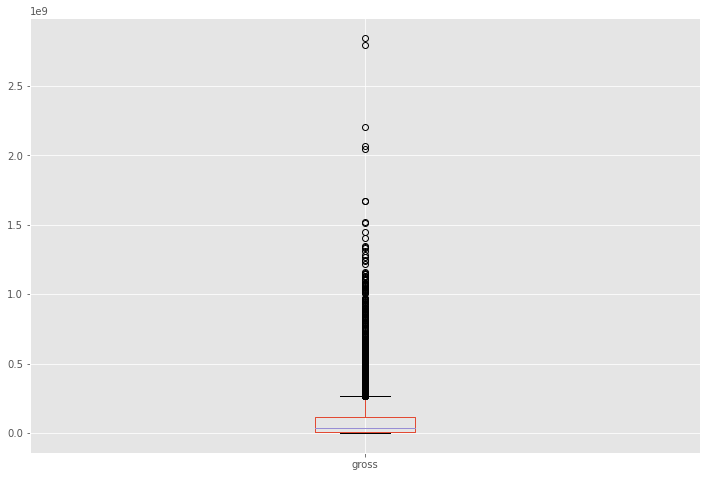

In [61]:
df.boxplot(column=['gross'])

In [62]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [63]:
df.drop_duplicates().head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


Text(0.5, 1.0, 'budget vs gross earning')

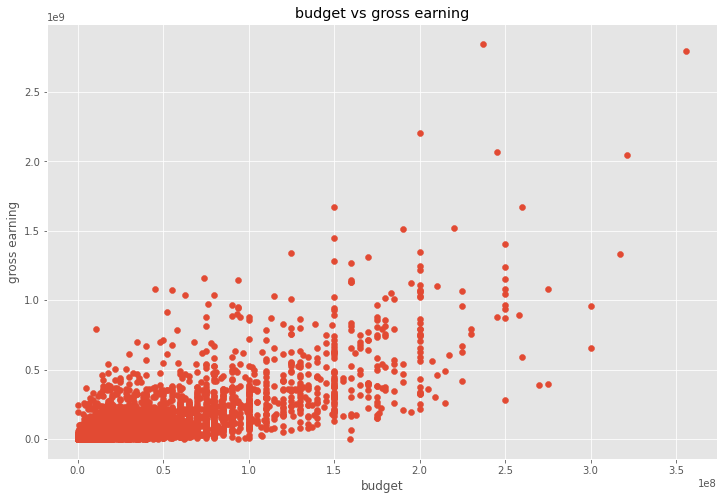

In [64]:
plt.scatter(x=df['budget'] , y=df['gross'])
plt.xlabel('budget')
plt.ylabel('gross earning')
plt.title('budget vs gross earning')



<AxesSubplot:xlabel='budget', ylabel='gross'>

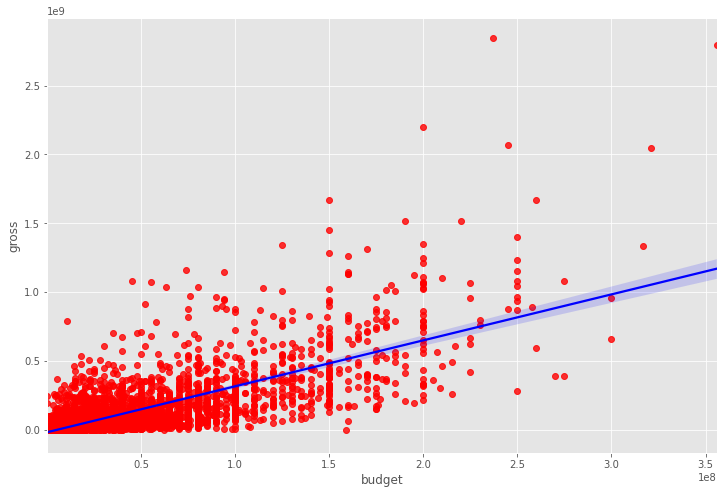

In [65]:
sns.regplot(x='budget',y='gross', data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

<AxesSubplot:xlabel='score', ylabel='gross'>

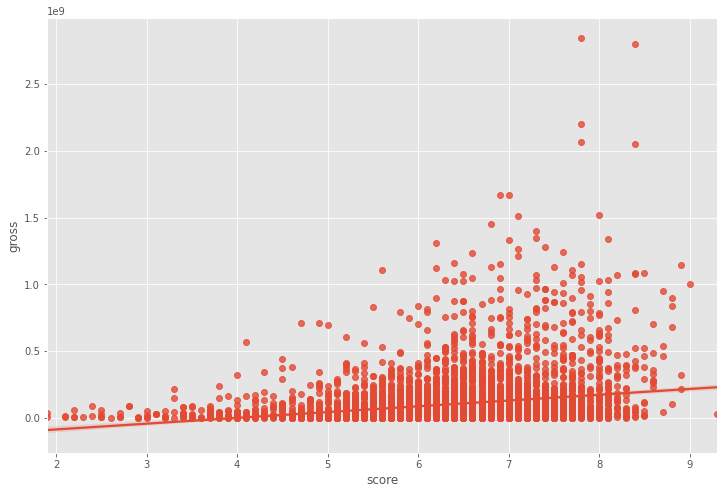

In [66]:
sns.regplot(x="score", y="gross", data=df)

In [67]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Text(0.5, 1.0, 'correlation matrix')

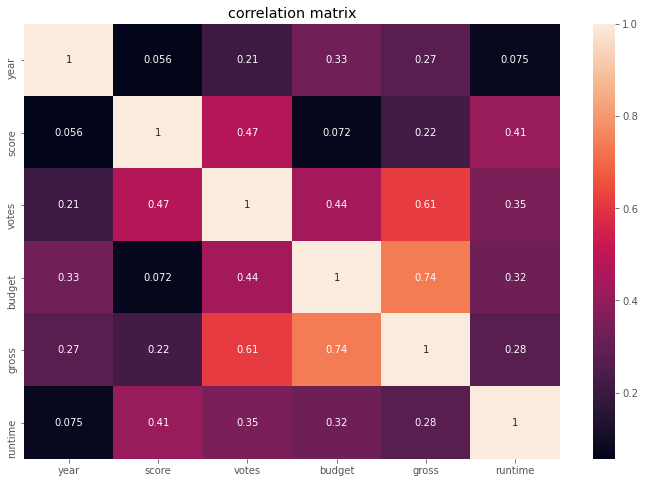

In [68]:
sns.heatmap(df.corr(), annot=True)
plt.title('correlation matrix')

In [70]:

        
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedyear
name,1.000000,0.314800,0.186668,0.267282,0.667785,0.136453,0.608411,0.679808,0.764057,0.599410,0.124405,0.526690,0.986431,0.631721,0.089567,0.262849
rating,0.314800,1.000000,0.031419,0.096638,0.241253,-0.075109,0.121122,0.230190,0.251470,0.226007,0.111309,0.283770,0.319778,0.269792,0.029208,0.087261
genre,0.186668,0.031419,1.000000,0.075279,0.115079,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329,0.071750
year,0.267282,0.096638,0.075279,1.000000,0.359792,0.045163,0.286895,0.186504,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011,0.949995
released,0.667785,0.241253,0.115079,0.359792,1.000000,0.099608,0.481682,0.478950,0.541155,0.439566,0.095519,0.396934,0.677897,0.410407,0.058183,0.358544
score,0.136453,-0.075109,0.047421,0.045163,0.099608,1.000000,0.247863,0.176116,0.122357,0.139126,-0.057087,-0.005767,0.139819,0.022732,0.057866,0.053108
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525,0.287857
director,0.679808,0.230190,0.131437,0.186504,0.478950,0.176116,0.472671,1.000000,0.642875,0.504992,0.123672,0.443150,0.692902,0.528071,0.084943,0.190556
writer,0.764057,0.251470,0.129595,0.231664,0.541155,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645,0.230543
star,0.599410,0.226007,0.143735,0.240670,0.439566,0.139126,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455443,0.096652,0.242124


Text(0.5, 1.0, 'correlation matrix')

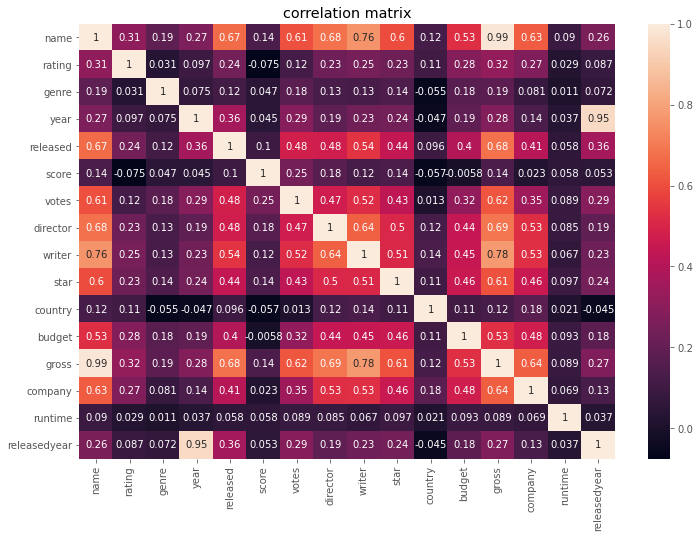

In [72]:
sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr(method='pearson'), annot=True)
plt.title('correlation matrix')

In [80]:
CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [103]:
df.groupby(['company', 'year'])[["gross"]].sum().astype('int64')[:15]

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
1818 Productions                    1983   12232628
19 Entertainment                    2003    4928883
1978 Films                          2017   40656399
1984 Private Defense Contractors    2014   58834384
2 Loop Films                        2002     264349
2.0 Entertainment                   2019  122810399
2.4.7. Films                        2007   22783978
2003 Productions                    2004   69424389
20th Century Studios                2020  111105497
21 Laps Entertainment               2014   41296320

In [93]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='gross'>

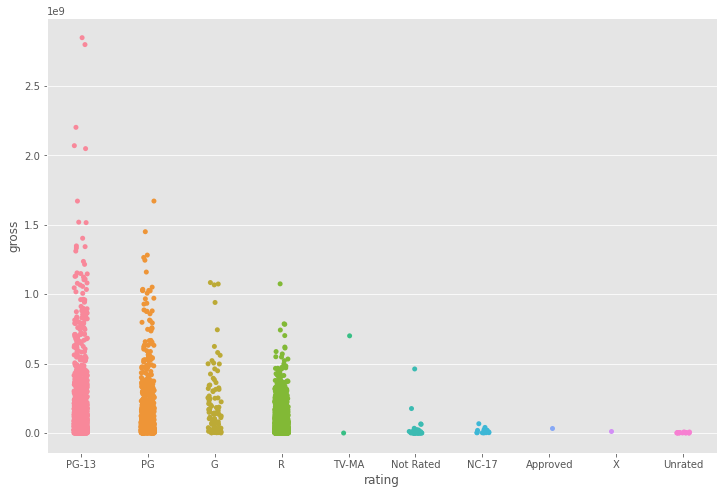

In [94]:
sns.stripplot(x="rating", y="gross", data=df)

In [111]:
corr_unstack=df.apply(lambda x: x.factorize()[0]).corr(method='pearson').unstack()
corr_unstack[:50]

name    name            1.000000
        rating          0.314800
        genre           0.186668
        year            0.267282
        released        0.667785
        score           0.136453
        votes           0.608411
        director        0.679808
        writer          0.764057
        star            0.599410
        country         0.124405
        budget          0.526690
        gross           0.986431
        company         0.631721
        runtime         0.089567
        releasedyear    0.262849
rating  name            0.314800
        rating          1.000000
        genre           0.031419
        year            0.096638
        released        0.241253
        score          -0.075109
        votes           0.121122
        director        0.230190
        writer          0.251470
        star            0.226007
        country         0.111309
        budget          0.283770
        gross           0.319778
        company         0.269792
        ru

In [112]:
sorted_pair=corr_unstack.sort_values()[:50]
print(sorted_pair)

score         rating         -0.075109
rating        score          -0.075109
score         country        -0.057087
country       score          -0.057087
genre         country        -0.055109
country       genre          -0.055109
year          country        -0.047325
country       year           -0.047325
releasedyear  country        -0.045134
country       releasedyear   -0.045134
budget        score          -0.005767
score         budget         -0.005767
genre         runtime         0.011329
runtime       genre           0.011329
country       votes           0.013363
votes         country         0.013363
country       runtime         0.020546
runtime       country         0.020546
company       score           0.022732
score         company         0.022732
rating        runtime         0.029208
runtime       rating          0.029208
genre         rating          0.031419
rating        genre           0.031419
releasedyear  runtime         0.036785
runtime       releasedyea

In [97]:
high_corr=sorted_pair[(sorted_pair)>0.5]

In [98]:
print(high_corr)

star          director        0.504992
director      star            0.504992
writer        star            0.510628
star          writer          0.510628
writer        votes           0.522918
votes         writer          0.522918
name          budget          0.526690
budget        name            0.526690
director      company         0.528071
company       director        0.528071
writer        company         0.532013
company       writer          0.532013
budget        gross           0.532810
gross         budget          0.532810
released      writer          0.541155
writer        released        0.541155
name          star            0.599410
star          name            0.599410
votes         name            0.608411
name          votes           0.608411
gross         star            0.612142
star          gross           0.612142
gross         votes           0.620450
votes         gross           0.620450
company       name            0.631721
name          company    

In [99]:
#takeaways
#votes and budget had maximum impact on gross earnings
#company had lesser impact on gross earning as opposed to general consesnus